# サポートベクターマシンの分類

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


# 線形サポートベクターマシンモデル

L2正規化を用いて分類を行う。  
通常SVMと呼ばれているアルゴリズムの原型となるモデル。

## データセットの読み込み

In [2]:
import mglearn

X, y = mglearn.datasets.make_forge()
print('X.shape : ', X.shape)
print('y.shape : ', y.shape)
print('X : \n', X[:5])
print('y : \n', y[:5])

X.shape :  (26, 2)
y.shape :  (26,)
X : 
 [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
y : 
 [1 0 1 0 0]


c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


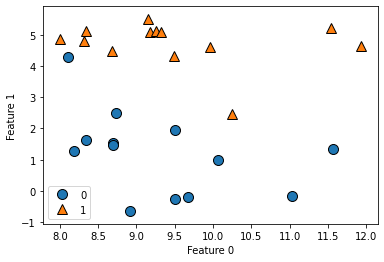

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (19, 2)
X_test.shape :  (7, 2)
y_train.shape :  (19,)
y_test.shape :  (7,)


## 線形サポートベクターマシンモデルの学習

In [5]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_train, y_train)

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9473684210526315

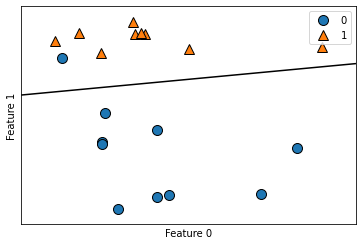

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_train, fill=False, eps=0.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## モデルの評価

In [7]:
model.score(X_test, y_test)

0.8571428571428571

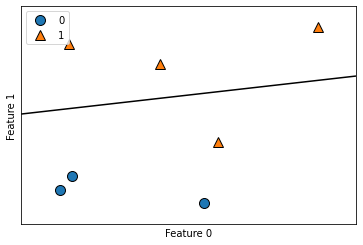

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_test, fill=False, eps=0.5)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## パラメータ調整

Cが大きくなれば正規化が弱くなり、個々のデータを正確にクラス分類を行うようになる。  
Cが小さい場合は1つ1つのデータではなく、大多数の分類を行うようになる。

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


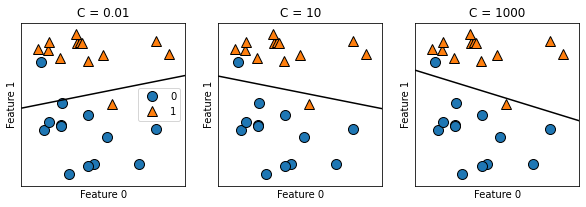

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
cs = [0.01, 10, 1000]

for c, ax in zip(cs, axes):
    model = LinearSVC(C=c)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C = " + str(c))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

# 2項分類を用いた多項分類

多項分類場合、複数の2項分類を組み合わせることで行うことができる。  
1つの項目かその他の項目を2項分類し、そのスコアが一番高いものが勝ちになる。

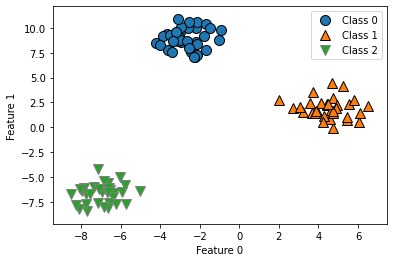

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

## 線形サポートベクターマシンモデルの学習

In [11]:
lsvm = LinearSVC().fit(X, y)

In [12]:
lsvm.coef_.shape

(3, 2)

In [13]:
lsvm.intercept_.shape

(3,)

## 予測結果の表示

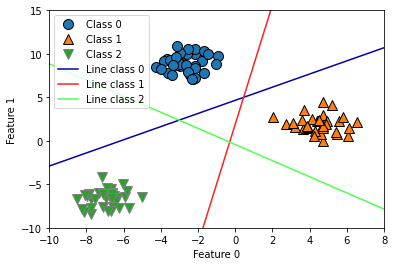

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])

Text(0, 0.5, 'Feature 1')

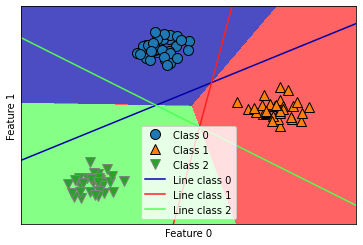

In [15]:
mglearn.plots.plot_2d_classification(lsvm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# カーネル法を用いたサポートベクターマシン

線形サポートベクターマシンは線形モデルのため下記のような訓練セットを学習することは難しい。  
そのためカーネル法を用いたサポートベクターマシンを用いる。  
一般的にSVMはこのモデルのことを指す。

In [55]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


## サポートベクターマシンモデルの学習

In [57]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9473684210526315

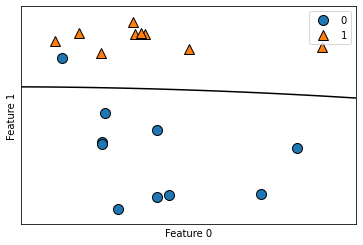

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_train, fill=False, eps=0.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## モデルの評価

In [61]:
model.score(X_test, y_test)

0.8571428571428571

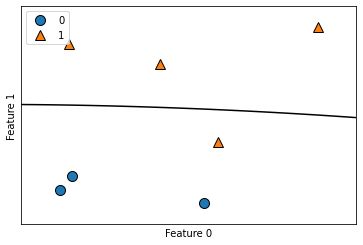

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_test, fill=False, eps=0.5)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## パラメータ調整

パラメータは下記2つある。  
- gamma: ガウシアンカーネルの幅の調整。  
gammaが大きい場合、個々のデータを重視するようになり、よりモデルが複雑になる。
- C: 正規化パラメータ  
Cが大きい場合、個々のデータを重視するようになり、よりモデルが複雑になる。

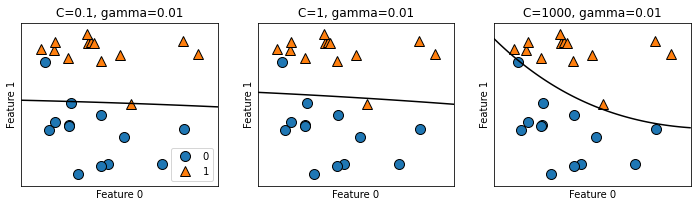

In [56]:
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cs = [0.1, 1, 1000]
gamma = 0.01
for c, ax in zip(cs, axes):
    model = SVC(C=c, gamma=gamma)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C=" + str(c) + ", gamma=" + str(gamma))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

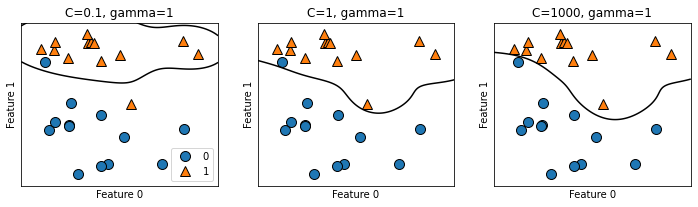

In [53]:
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cs = [0.1, 1, 1000]
gamma = 1
for c, ax in zip(cs, axes):
    model = SVC(C=c, gamma=gamma)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C=" + str(c) + ", gamma=" + str(gamma))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

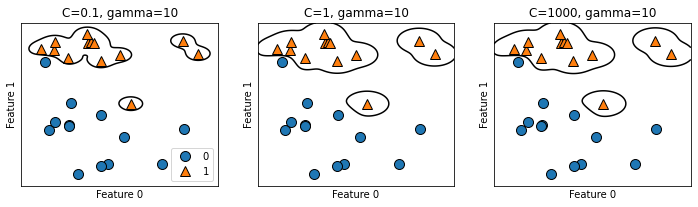

In [54]:
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cs = [0.1, 1, 1000]
gamma = 10
for c, ax in zip(cs, axes):
    model = SVC(C=c, gamma=gamma)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C=" + str(c) + ", gamma=" + str(gamma))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [66]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [67]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [68]:
print('特徴量の種類')
print(iris_dataset['feature_names'])
print('\nshape')
print(iris_dataset['data'].shape)
print('\n特徴量の確認')
print(iris_dataset['data'][:5])

特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

shape
(150, 4)

特徴量の確認
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [69]:
print('ラベルの種類')
print(iris_dataset['target_names'])
print('\nshape')
print(iris_dataset['target'].shape)
print('\nラベルの確認')
print(iris_dataset['target'])

ラベルの種類
['setosa' 'versicolor' 'virginica']

shape
(150,)

ラベルの確認
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
from sklearn.model_selection import train_test_split

X = iris_dataset['data']
y = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (112, 4)
y_train.shape :  (112,)
X_test.shape :  (38, 4)
y_test.shape :  (38,)


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

model = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [78]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [79]:
model.score(X_train, y_train)

0.9910714285714286

In [80]:
print("Best parameters: ", model.best_params_)
print("Best estimator: ", model.best_estimator_)
print("Best cross-validation score: ", model.best_score_)

Best parameters:  {'C': 10, 'gamma': 0.1}
Best estimator:  SVC(C=10, gamma=0.1)
Best cross-validation score:  0.9731225296442687


In [ ]:
model.score(X_test, y_test)